<a href="https://colab.research.google.com/github/ali-talebi/Task_sf/blob/main/End_Edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### با عرض سلام و ادب و احترام 
### تیکه اول به پردازش اطلاعات با توجه به رویکرد حل مسئله پرداخته شده از نگاه شخصی 
### در باقی نوت بوک با توجه به سوال دقیق مشخص شده در تسک  

In [86]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Load Data 

In [19]:
data = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [20]:
data 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


### Information about Data 

In [21]:
print(data.isnull().sum())

order_id             0
user_id              0
created_at           0
discount_cost        0
discount_type    22132
basket               0
dtype: int64


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  6925 non-null   float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB
None


### Converting on created_at columns and Split Year , Month , Day and anothers  

In [23]:
data["created_at"] = pd.to_datetime(data["created_at"])
data['year'] = data['created_at'].dt.year 
data['month'] = data['created_at'].dt.month 
data['day'] = data['created_at'].dt.day
data['dayofyear'] = pd.DatetimeIndex(data['created_at']).dayofyear 
data['weekofyear'] = pd.DatetimeIndex(data['created_at']).weekofyear 
data["dayofweek"]  = pd.DatetimeIndex(data['created_at']).dayofweek 
data['is_month_start'] = pd.DatetimeIndex(data['created_at']).is_month_start
data['is_month_end'] = pd.DatetimeIndex(data['created_at']).is_month_end 
data = pd.get_dummies(data, columns=['is_month_start'], drop_first=True, prefix='m_start')
data = pd.get_dummies(data, columns=['is_month_end'], drop_first=True, prefix='m_end')

In [24]:
data

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
0,1,1,2021-04-12,10000,1.0,12000,2021,4,12,102,15,0,0,0
1,2,2,2021-05-09,0,NaN,20000,2021,5,9,129,18,6,0,0
2,3,3,2021-05-09,10000,1.0,14000,2021,5,9,129,18,6,0,0
3,4,4,2021-11-10,0,NaN,15000,2021,11,10,314,45,2,0,0
4,5,5,2021-11-10,10000,1.0,16000,2021,11,10,314,45,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022,7,31,212,30,6,0,1
29053,29054,9985,2022-07-31,0,NaN,25000,2022,7,31,212,30,6,0,1
29054,29055,8843,2022-07-31,6000,1.0,24000,2022,7,31,212,30,6,0,1
29055,29056,8703,2022-07-31,0,NaN,40000,2022,7,31,212,30,6,0,1


In [26]:
print("count of users unique : "  , len(data.user_id.unique()) ) 

count of users unique :  9985


### تعداد خرید مشتریان بر اساس آیدی کاربر 
###### مشتری با ایدی 1984 به میزان 117 بار ثبت سفارش انجام داده است 

In [27]:
data.user_id.value_counts()

1984    117
3276     70
4360     67
806      64
500      63
       ... 
4624      1
4623      1
4622      1
4621      1
9985      1
Name: user_id, Length: 9985, dtype: int64

In [28]:
data[data["user_id"] == 1984 ]

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
2774,2775,1984,2022-02-08,0,NaN,28000,2022,2,8,39,6,1,0,0
2875,2876,1984,2022-02-09,0,NaN,28000,2022,2,9,40,6,2,0,0
2941,2942,1984,2022-02-10,0,NaN,28000,2022,2,10,41,6,3,0,0
3164,3165,1984,2022-02-12,0,NaN,28000,2022,2,12,43,6,5,0,0
3168,3169,1984,2022-02-12,0,NaN,14000,2022,2,12,43,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,27845,1984,2022-07-26,0,NaN,72000,2022,7,26,207,30,1,0,0
28043,28044,1984,2022-07-27,0,NaN,72000,2022,7,27,208,30,2,0,0
28229,28230,1984,2022-07-28,0,NaN,66000,2022,7,28,209,30,3,0,0
28672,28673,1984,2022-07-30,0,NaN,72000,2022,7,30,211,30,5,0,0


#####  در نمودار زیر مشاهده میشود نزدیک به 5000 آیدی فقط 1 بار خرید انجام داده اند 

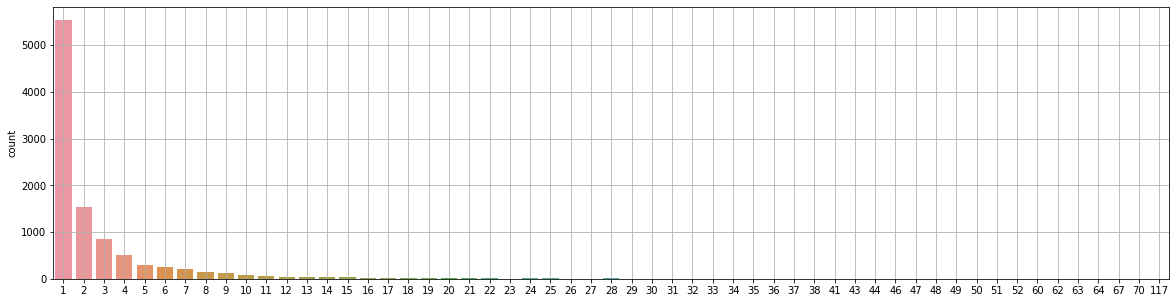

In [29]:
s = data.user_id.value_counts()
plt.figure(figsize = (20 , 5 ))
sns.countplot(s.values )
plt.grid()
plt.show()

#### در سلول زیر تعداد آیدی هایی که یک بار خرید انجام داده اند رو مشاهده میکنید 

In [30]:
s = data.user_id.value_counts()
count_1 = 0 
for i in s.values : 
  if i == 1 : 
    count_1 += 1 

print("counts of 1 buy : " , count_1 ) 


counts of 1 buy :  5541


### میزان حجم خرید را مشاهده میکنید 

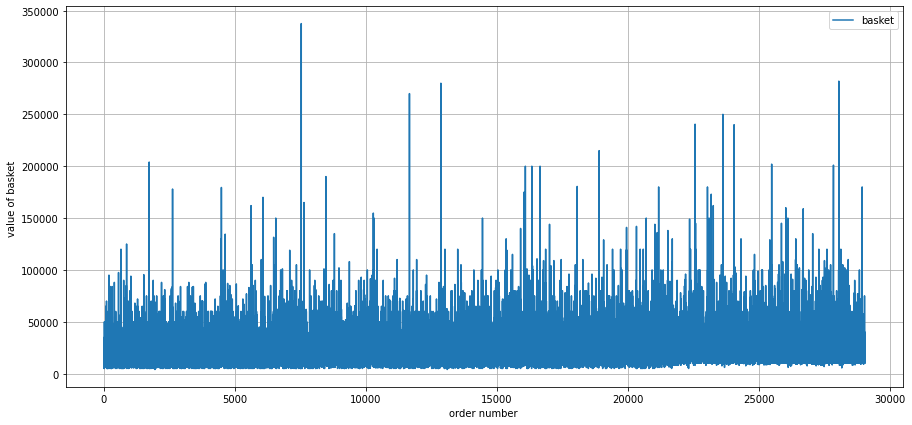

In [31]:
plt.figure(figsize = (15 , 7 ))
plt.plot(data["basket"] , label = "basket" )
plt.legend()
plt.ylabel("value of basket ")
plt.xlabel("order number ")
plt.grid()
plt.show()

##### در شکل زیر میزان خرید در هر ماه مشاهده میکنید 

In [32]:
x = data.month.unique()
y = []
total_data_frames_divide_any_month = [ ]
for i  , j in enumerate(x) : 
  s = data[data.month == j ]
  total_data_frames_divide_any_month.append( s.basket ) 
  

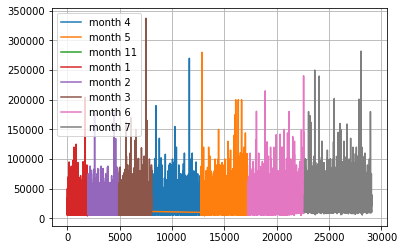

In [33]:
for i in range(len(x)) : 
  plt.plot(total_data_frames_divide_any_month[i] , label = f"month {x[i]}")

plt.legend()
plt.grid()
plt.show()

#### همانطور که مشاهده میکنید در ماه 7 ام میزان 6395 تا سفارش داشته ایم که بیشترین میزان سفارش در این ماه از سال است 

In [35]:
print(data.month.value_counts())

7     6395
6     5419
4     4714
5     4481
3     3132
2     2915
1     1999
11       2
Name: month, dtype: int64


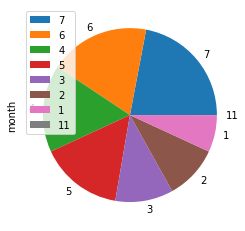

In [36]:
data.month.value_counts().plot(kind = "pie" )
plt.legend()

##### همانطور که مشاهده میکنید در 5 امین روز هفته نسبت به بقیه روز ها در سال بیشترین تعداد خرید انجام شده است 

In [37]:
data.dayofweek.value_counts()

4    5227
3    4360
6    3988
5    3925
1    3921
2    3841
0    3795
Name: dayofweek, dtype: int64

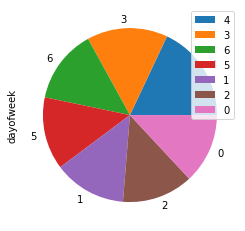

In [38]:
data.dayofweek.value_counts().plot(kind = "pie" )
plt.legend()

In [41]:
list_day_of_week = data.dayofweek.unique()
basket_day_of_week = [] 
for i , j in enumerate(list_day_of_week) :
  result = sum(data[ data.dayofweek == j ]["basket"])
  basket_day_of_week.append(result) 


e = pd.DataFrame()
e["day_of_week"] =  list_day_of_week
e["basket"] = basket_day_of_week  

In [42]:
e 

,day_of_week,basket
0,0,90879999
1,6,96104755
2,2,93833440
3,5,95287605
4,1,94689547
5,3,109819449
6,4,124714280


### میزان ارزش خرید تا حالا در روز های هفته در شکل زیر میبینید که باز هم مربوط به 5 روز هفته  مشخص میباشد 

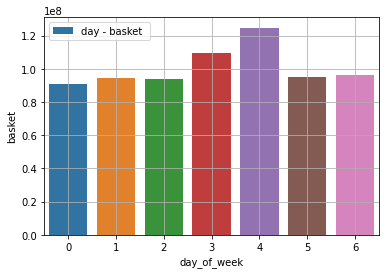

In [53]:
sns.barplot(e.day_of_week , e.basket , label = "day - basket "  ) 
plt.legend()
plt.grid()
plt.show()

This Month is : 4 
4    902
3    699
5    653
0    647
1    628
6    607
2    578
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  902


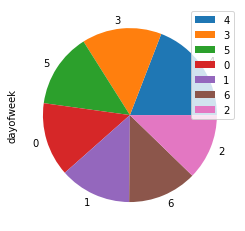

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 5 
1    747
4    745
6    675
0    653
3    563
5    554
2    544
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  2 count :  747


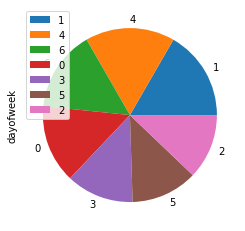

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 11 
2    2
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  3 count :  2


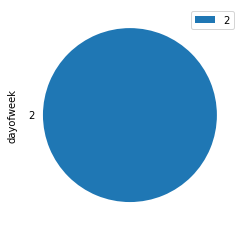

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 1 
4    339
0    321
3    310
5    300
6    276
2    232
1    221
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  339


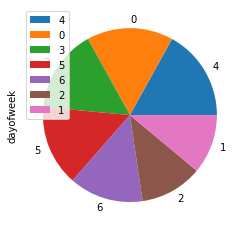

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 2 
4    558
3    462
1    407
2    379
0    375
5    369
6    365
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  558


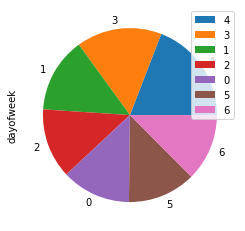

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 3 
2    518
1    505
3    500
4    461
6    399
5    390
0    359
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  3 count :  518


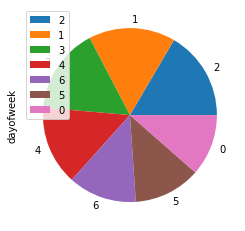

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 6 
3    1001
4     915
2     834
6     730
5     673
1     644
0     622
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  4 count :  1001


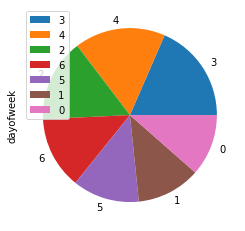

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 7 
4    1307
5     986
6     936
3     825
0     818
1     769
2     754
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  1307


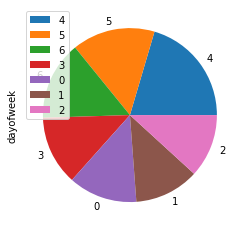

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----


In [54]:
monthes = data.month.unique()
y = []
for i in monthes : 
  print(f"This Month is : {i} ")
  every_month = data[ data["month"] == i ]
  s = every_month.dayofweek.value_counts()
  print(s)
  print("بیشترین خرید  در روز "  , s.index[0]+1 , "count : " , s.values[0])
  every_month.dayofweek.value_counts().plot(kind = "pie" )
  plt.legend()
  plt.show()  
  
  print('-----****-----' * 10 )
  


### در شکل زیر میزان وابستگی روز در ماه ، روز در سال ، روز در هفنه ، هفته در سال ، ابتدا و آخر ماه بودن با میزان خرید مشاهده میکنید 

### که روز در سال و هفته در سال از باقی ستون ها بیش تر تاثیر در میزان خرید دارد که البته این مقدار آنچنان نیست به اندازه 0.14 

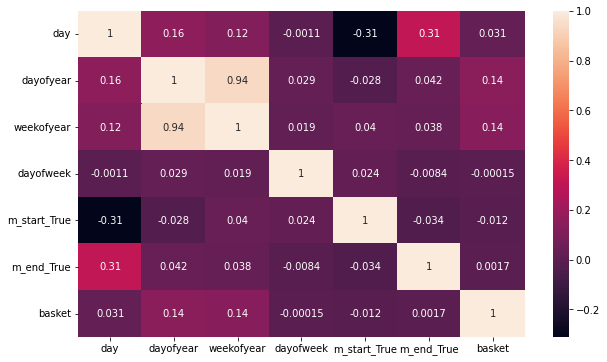

In [124]:
data_split = data[["day" , "dayofyear","weekofyear" , "dayofweek" , "m_start_True" , "m_end_True" , "basket"  ]].corr() 
plt.figure(figsize = (10 , 6 ) )
sns.heatmap(data_split , annot = True ) 
plt.show()

## سوال اول تسک 

In [62]:
df = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [63]:
df

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [64]:
df["created_at"] = pd.to_datetime(df["created_at"] , errors = "coerce" )

In [66]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,NaN,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,NaN,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000
29053,29054,9985,2022-07-31,0,NaN,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,NaN,40000


In [67]:
df = pd.DataFrame(df.groupby(["created_at","user_id"]).agg({'order_id':max , 'discount_cost' :sum  , 'basket':sum })).reset_index() 

In [68]:
df 

,created_at,user_id,order_id,discount_cost,basket
0,2021-04-12,1,1,10000,12000
1,2021-05-09,2,2,0,20000
2,2021-05-09,3,3,10000,14000
3,2021-11-10,4,4,0,15000
4,2021-11-10,5,5,10000,16000
...,...,...,...,...,...
28513,2022-07-31,9981,29031,10000,24000
28514,2022-07-31,9982,29034,0,30000
28515,2022-07-31,9983,29036,0,21000
28516,2022-07-31,9984,29039,0,22000


In [69]:
df['tx_month'] = df['created_at'].apply(lambda x: dt.date(x.year, x.month,1)) 

In [72]:
df['acq_month'] = df.groupby('user_id')['tx_month'].transform('min') 

In [73]:
def diff_month(x):

    d1 = x['tx_month']

    d2 = x["acq_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)


In [74]:
df 

,created_at,user_id,order_id,discount_cost,basket,tx_month,acq_month,cohort_idx
0,2021-04-12,1,1,10000,12000,2021-04-01,2021-04-01,1
1,2021-05-09,2,2,0,20000,2021-05-01,2021-05-01,1
2,2021-05-09,3,3,10000,14000,2021-05-01,2021-05-01,1
3,2021-11-10,4,4,0,15000,2021-11-01,2021-11-01,1
4,2021-11-10,5,5,10000,16000,2021-11-01,2021-11-01,1
...,...,...,...,...,...,...,...,...
28513,2022-07-31,9981,29031,10000,24000,2022-07-01,2022-07-01,1
28514,2022-07-31,9982,29034,0,30000,2022-07-01,2022-07-01,1
28515,2022-07-31,9983,29036,0,21000,2022-07-01,2022-07-01,1
28516,2022-07-31,9984,29039,0,22000,2022-07-01,2022-07-01,1


In [79]:
df["cohort_idx"].unique()

array([ 1,  3,  2,  5, 12, 11,  4,  6, 14,  7, 15])

In [80]:
df["cohort_idx"].value_counts()

1     13136
2      4755
3      3644
4      2949
5      1975
6      1377
7       675
12        2
14        2
15        2
11        1
Name: cohort_idx, dtype: int64

In [75]:
def get_cohort_matrix(data, var='user_id', fun=pd.Series.nunique):

    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()

    cc = cd.pivot_table(index = 'acq_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [76]:
cc, retention = get_cohort_matrix(df)

In [77]:
cc 

cohort_idx,1,2,3,4,5,6,7,11,12,14,15
acq_month,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### در شکل زیر مشاهده میکنید که هر کوهورتی ( که در اینجا تاریخ جذب است )  که ما داشتیم بعد از چند ماه چه میزان از آنان دوباره  رجوع کرده اند
### مثلا نشان میدهد افرادی که در تاریخ 1 - 5  - 2021 جذب شده اند 
### پنجاه درصد آنان بعد از 11 ماه دوباره برگشته اند 

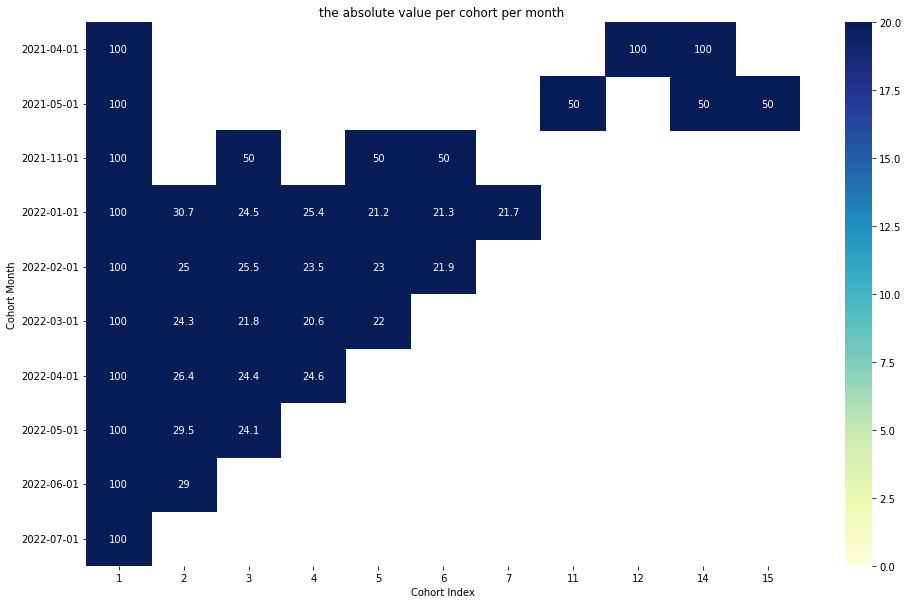

In [87]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
# Creating the heatmap
plt.title("the absolute value per cohort per month ")
sns.heatmap(retention , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [90]:
cc_q, ret_b = get_cohort_matrix( df, var="basket" , fun=pd.Series.mean )

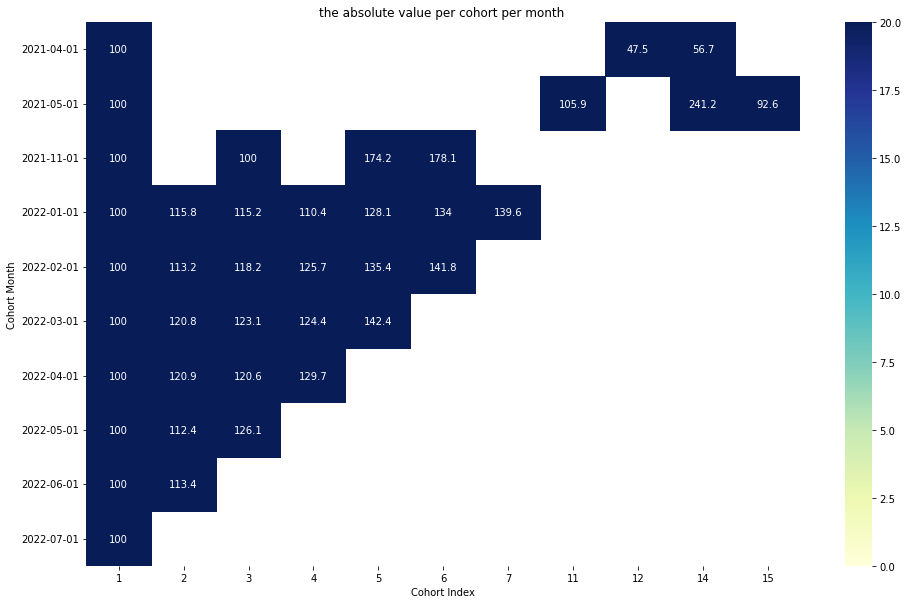

In [91]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
# Creating the heatmap
plt.title("the absolute value per cohort per month ")
sns.heatmap(ret_b , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [110]:
df3 = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [111]:
df3 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [112]:
user_id_list = []
user_first_basket = []
user_first_discount = []
Date_Order = []

In [113]:
for i in range(len(df3)) : 
  if int(df3.loc[ i , "user_id" ]) not in  user_id_list : 
    user_id_list.append(df3.loc[ i , "user_id" ])
    user_first_basket.append(df3.loc[ i , "basket" ])
    user_first_discount.append(df3.loc[ i , "discount_cost" ])
    Date_Order.append(df3.loc[ i , "created_at" ])


In [130]:
df4 = pd.DataFrame()
df4["user_id"] = user_id_list 
df4["Date_First_order"] = Date_Order
df4["user_first_discount"] = user_first_discount 
df4["user_first_basket"] = user_first_basket 

In [131]:
df4

,user_id,Date_First_order,user_first_discount,user_first_basket
0,1,4/12/2021,10000,12000
1,2,5/9/2021,0,20000
2,3,5/9/2021,10000,14000
3,4,11/10/2021,0,15000
4,5,11/10/2021,10000,16000
...,...,...,...,...
9980,9981,7/31/2022,10000,24000
9981,9982,7/31/2022,0,30000
9982,9983,7/31/2022,0,21000
9983,9984,7/31/2022,0,22000


In [132]:
df4["Date_First_order"] = pd.to_datetime(df4["Date_First_order"])
df4['year'] = df4['Date_First_order'].dt.year 
df4['month'] = df4['Date_First_order'].dt.month 
df4['day'] = df4['Date_First_order'].dt.day


df4['dayofyear'] = pd.DatetimeIndex(df4['Date_First_order']).dayofyear 
df4['weekofyear'] = pd.DatetimeIndex(df4['Date_First_order']).weekofyear 
df4["dayofweek"]  = pd.DatetimeIndex(df4['Date_First_order']).dayofweek 
to_one_hot = pd.to_datetime(df4['dayofweek']).dt.day_name 
df4['is_month_start'] = pd.DatetimeIndex(df4['Date_First_order']).is_month_start
df4['is_month_end'] = pd.DatetimeIndex(df4['Date_First_order']).is_month_end 


In [134]:
df4 = pd.get_dummies(df4, columns=['is_month_start'], drop_first=True, prefix='m_start')
df4 = pd.get_dummies(df4, columns=['is_month_end'], drop_first=True, prefix='m_end')

In [135]:
df4 

,user_id,Date_First_order,user_first_discount,user_first_basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
0,1,2021-04-12,10000,12000,2021,4,12,102,15,0,0,0
1,2,2021-05-09,0,20000,2021,5,9,129,18,6,0,0
2,3,2021-05-09,10000,14000,2021,5,9,129,18,6,0,0
3,4,2021-11-10,0,15000,2021,11,10,314,45,2,0,0
4,5,2021-11-10,10000,16000,2021,11,10,314,45,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9981,2022-07-31,10000,24000,2022,7,31,212,30,6,0,1
9981,9982,2022-07-31,0,30000,2022,7,31,212,30,6,0,1
9982,9983,2022-07-31,0,21000,2022,7,31,212,30,6,0,1
9983,9984,2022-07-31,0,22000,2022,7,31,212,30,6,0,1


In [138]:
s = df4[["year","month","day","dayofyear","weekofyear" , "dayofweek" , "m_start_True" , "m_end_True" , "user_first_discount" , "user_first_basket"]] 

In [139]:
s 

,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True,user_first_discount,user_first_basket
0,2021,4,12,102,15,0,0,0,10000,12000
1,2021,5,9,129,18,6,0,0,0,20000
2,2021,5,9,129,18,6,0,0,10000,14000
3,2021,11,10,314,45,2,0,0,0,15000
4,2021,11,10,314,45,2,0,0,10000,16000
...,...,...,...,...,...,...,...,...,...,...
9980,2022,7,31,212,30,6,0,1,10000,24000
9981,2022,7,31,212,30,6,0,1,0,30000
9982,2022,7,31,212,30,6,0,1,0,21000
9983,2022,7,31,212,30,6,0,1,0,22000


#### در شکل زیر میزان وابستگی ستون ها رو میزان خرید مشاهده میکنید البته در خرید اول مشتری 
### البته در اینجا هم  ماه در سال و هفته در سال و روز در سال به میزان کمی ولی بیشتر از باقی ستون ها به میزان فروش وابستگی دارد 

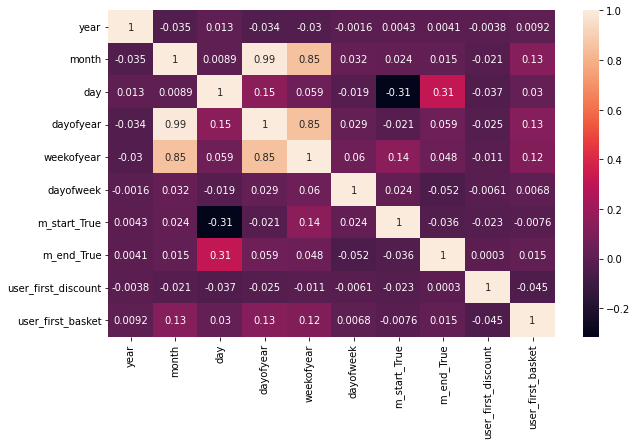

In [140]:
s_corr = s.corr()
plt.figure(figsize = (10 , 6 ) ) 
sns.heatmap(s_corr , annot = True ) 
plt.show()

In [141]:
df_t = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [142]:
df_t["created_at"] = pd.to_datetime(df_t["created_at"])
df_t['year'] = df_t['created_at'].dt.year 
df_t['month'] = df_t['created_at'].dt.month 
df_t['day'] = df_t['created_at'].dt.day 

In [143]:
Total_dict = {
              "user_id" : [] , 
              "Buy1" : [] , 
              "Buy2" : []  , 
              "Buy3" : [] , 
              
              }
unique_user = df_t["user_id"].unique()
every_body = []
for i in unique_user :
  every_body.append(i)
  list_data_person = []
  for index , j in enumerate(df_t.loc[ : , "user_id" ])  :
    if i == j :
      year  = df_t.iloc[ index , 6 ]
      month = df_t.iloc[ index , 7 ]
      day   = df_t.iloc[ index , 8 ]
      s = 0 
      if year == 2021 : 
        if month < 7 : 
          s += month * 31 + day 
        elif month > 6 and month < 13 : 
          s += month * 30 + day 

      else : 
        s += 365 

        if month < 7 : 
          s += month * 31 + day 

        elif month > 6 and month < 13 : 
          s += month * 30 + day 
      list_data_person.append(s)



   


  buy_1 = 0 
  buy_2 = 0
  buy_3 = 0 

  for index2 , j2 in enumerate(list_data_person[:-1]) : 
    diff = list_data_person[index2 + 1 ] - j2 
     
    if index2 == 0 : buy_1 = diff 

    elif index2 == 1 : buy_2 = diff 
    elif index2 == 2 : buy_3 = diff
  


  



  Total_dict["user_id"].append(i)
  Total_dict["Buy1"].append(buy_1)
  Total_dict["Buy2"].append(buy_2)
  Total_dict["Buy3"].append(buy_3)   
 

   


In [144]:
d2_new = pd.DataFrame(Total_dict)

#### محاسبه نسبت خرید مشتریان میباشد 

In [147]:
d2_new

,user_id,Buy1,Buy2,Buy3
0,1,350,3,40
1,2,391,0,0
2,3,322,106,1
3,4,130,28,0
4,5,74,0,0
...,...,...,...,...
9980,9981,0,0,0
9981,9982,0,0,0
9982,9983,0,0,0
9983,9984,0,0,0


In [146]:
df_t[df_t.user_id == 9985 ]

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day
29053,29054,9985,2022-07-31,0,NaN,25000,2022,7,31


In [149]:
d2_new.isnull().sum()

user_id    0
Buy1       0
Buy2       0
Buy3       0
dtype: int64

In [ ]:
d2_new